In [1]:
import pip
!pip install 'seaborn'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Regression with a Flood Prediction Dataset/train.csv")
train.head()
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

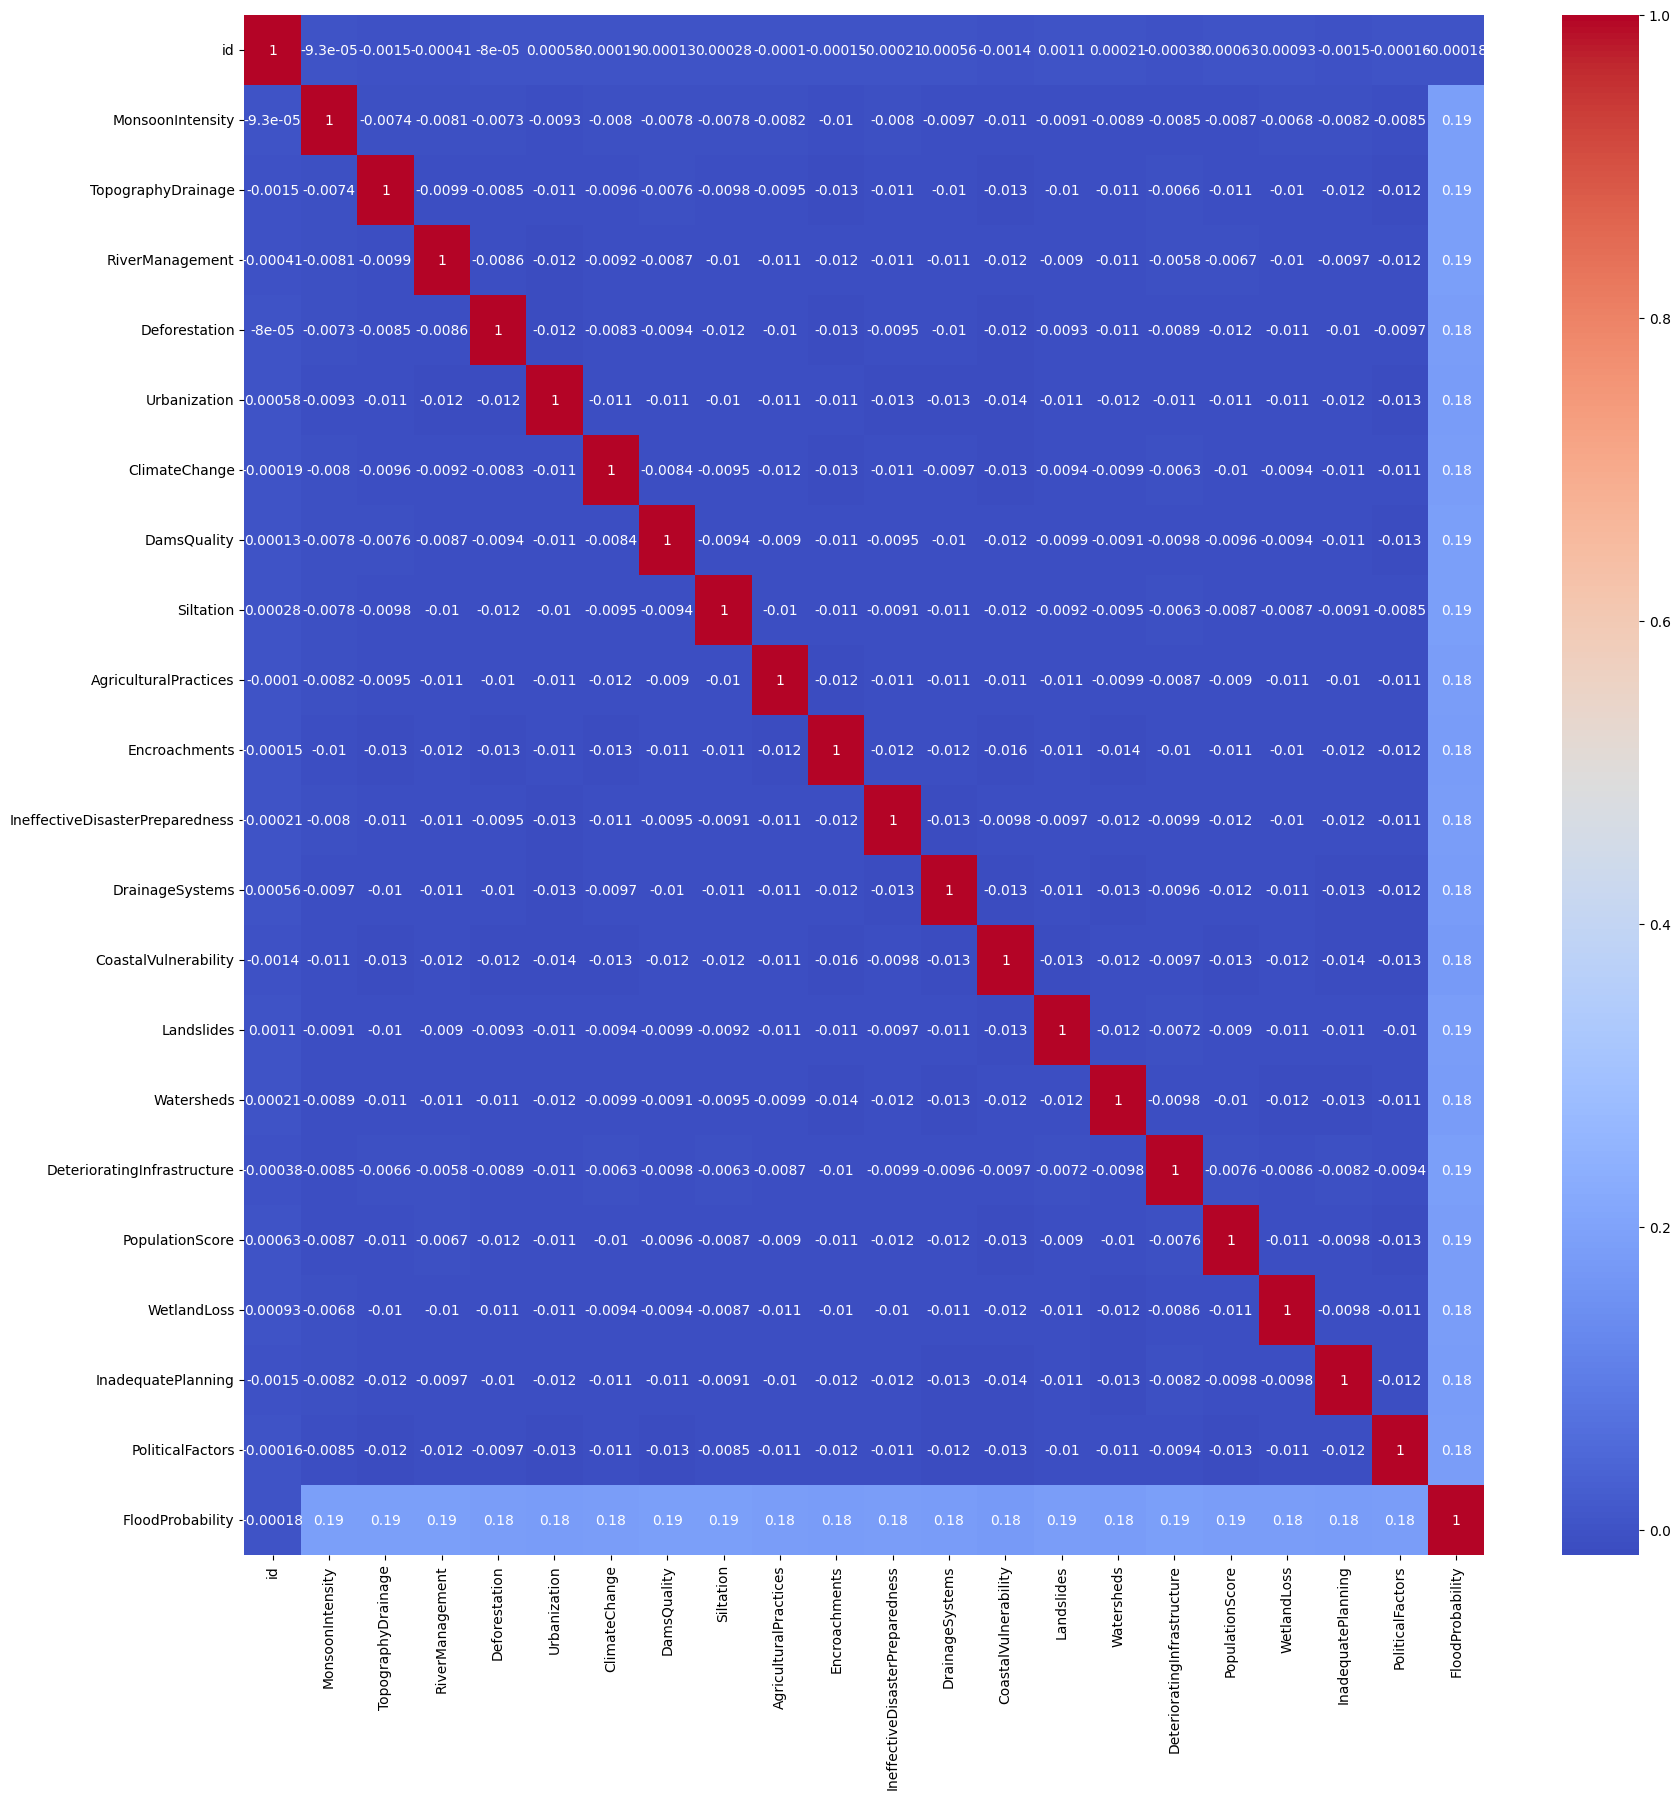

In [168]:
corr_mat=train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.show()

In [187]:
y_data = train[['FloodProbability']]
x_data = train[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']]
COL = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

In [188]:
#for col in COL:
#    temp = []
#    array = x_data[col]
#    for a in array:
#        if a>=6:
#            temp.append(1)
#        else:
#            temp.append(0)
#    x_data[col] = temp
#x_data

/var/folders/46/mjvmwj6x7n5_cdghvmx10bkm0000gn/T/ipykernel_11838/1590995276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data[col] = temp


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0
3,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0
1117953,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1117954,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1117955,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0


In [33]:
#x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25)

In [179]:
#poly = PolynomialFeatures(degree=2)
#poly.fit(x_data,y_data)
#x_poly_data = poly.fit_transform(x_data)

In [189]:
lr = LinearRegression()
lr.fit(x_data,y_data)
lr.score(x_data,y_data)
#yhat=lr.predict(TEST_data)

0.4900049284904996

In [190]:
TEST = pd.read_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Regression with a Flood Prediction Dataset/test.csv")
TEST_data = TEST.drop(['id'],axis=1)

In [191]:
#for col in COL:
#    temp = []
#    array = TEST_data[col]
#    for a in array:
#        if a>=6:
#            temp.append(1)
#        else:
#            temp.append(0)
#    TEST_data[col] = temp
#TEST_poly_data = poly.fit_transform(TEST_data)

In [193]:
yhat=lr.predict(TEST_data)

In [194]:
def savefile(y,test):
    y=y.round(1)
    ydf = pd.DataFrame(y,columns = ["FloodProbability"])
    RESULT = pd.concat([test,ydf],axis=1)
    result = RESULT[['id','FloodProbability']]
    result.to_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Regression with a Flood Prediction Dataset/result.csv",index=False)
savefile(yhat,TEST)